In [20]:
import os
import numpy as np
from glob import glob
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap

In [21]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [22]:
recourcesat_bands=glob("*B*.tif")
recourcesat_bands.sort()
recourcesat_bands

['L3-NE43C11-096-059-05Apr19-BAND2.tif',
 'L3-NE43C11-096-059-05Apr19-BAND3.tif',
 'L3-NE43C11-096-059-05Apr19-BAND4.tif',
 'L3-NE43C11-096-059-05Apr19-BAND5.tif']

In [23]:
src1=rio.open("L3-NE43C11-096-059-05Apr19-BAND2.tif")
src2=rio.open("L3-NE43C11-096-059-05Apr19-BAND3.tif")
src3=rio.open("L3-NE43C11-096-059-05Apr19-BAND4.tif")
src4=rio.open("L3-NE43C11-096-059-05Apr19-BAND5.tif")

In [25]:
#To check the type of file
type(src1)

rasterio.io.DatasetReader

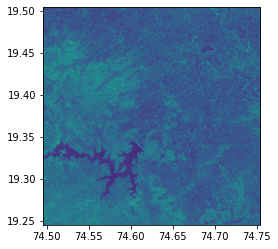

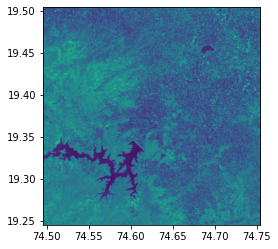

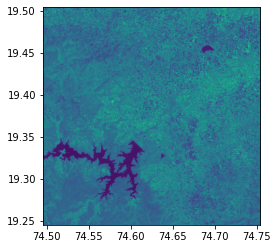

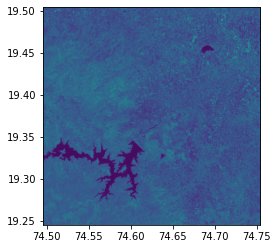

<Axes: >

In [28]:
show(src1)
show(src2)
show(src3)
show(src4)

In [29]:
stacked_resourcesat=[]
for img in recourcesat_bands:
    with rio.open(img, 'r') as f:
        stacked_resourcesat.append(f.read(1))

In [34]:
print("Length of stacked_resourcesat list:",len(stacked_resourcesat))
print("Shape of single file stacked_resourcesat list:",(stacked_resourcesat[0]).shape)


Length of stacked_resourcesat list: 4
Shape of single file stacked_resourcesat list: (1151, 1151)


In [35]:
stacked_resourcesat_img=np.stack(stacked_resourcesat)
print("Shape of stacked_resourcesat_img:",stacked_resourcesat_img.shape)


Shape of stacked_resourcesat_img: (4, 1151, 1151)


In [36]:
stacked_resourcesat_img_divided=stacked_resourcesat_img/10000
print("Shape of stacked_resourcesat_img:",stacked_resourcesat_img.shape)

Shape of stacked_resourcesat_img: (4, 1151, 1151)


In [37]:
print(stacked_resourcesat_img_divided.min(),stacked_resourcesat_img_divided.max())

0.0001 0.0644


In [38]:
normalized_img=(stacked_resourcesat_img-stacked_resourcesat_img.min())/(stacked_resourcesat_img.max())

In [39]:
normalized_img.min(), normalized_img.max()

(0.0, 0.9984472049689441)

In [41]:
titles=[f'band={i}' for i in range(2,6)]
print(titles)

['band=2', 'band=3', 'band=4', 'band=5']


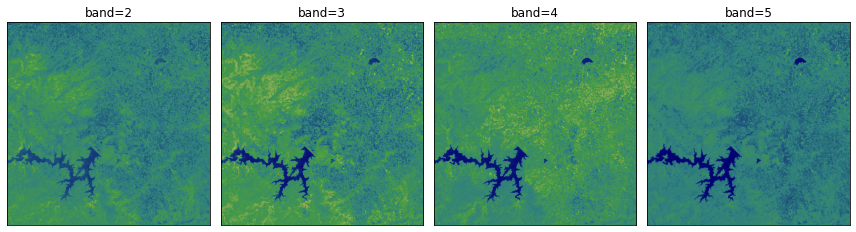

In [43]:
ep.plot_bands(
    arr=stacked_resourcesat_img, cmap='gist_earth', figsize=(12,12), cols=4, cbar=False, title= titles
)
plt.show()

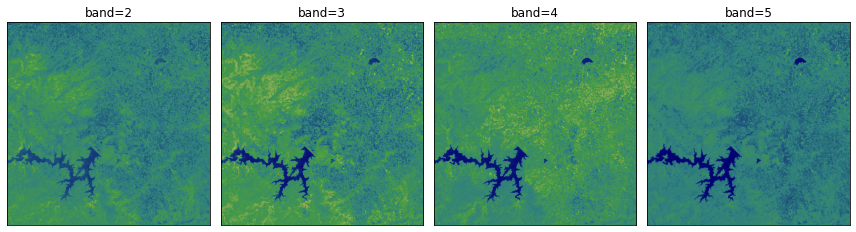

array([<Axes: title={'center': 'band=2'}>,
       <Axes: title={'center': 'band=3'}>,
       <Axes: title={'center': 'band=4'}>,
       <Axes: title={'center': 'band=5'}>], dtype=object)

In [44]:
ep.plot_bands(
    arr=normalized_img, cmap='gist_earth', figsize=(12,12), cols=4, cbar=False, title= titles
)

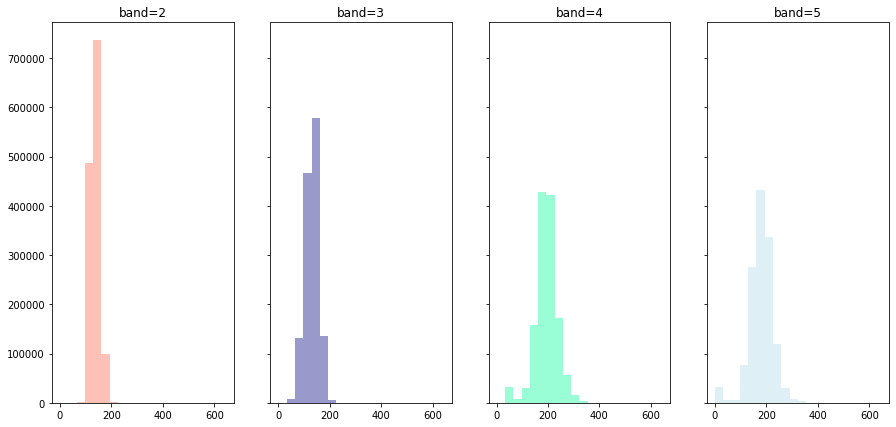

In [54]:
colors=['tomato', 'navy', 'MediumSpringGreen', 'lightblue']
ep.hist(
    arr=stacked_resourcesat_img, colors=colors, title=titles, cols=4, alpha=0.4, figsize=(15,7)
)
plt.show()